In [91]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')


In [52]:
G_symmetric = nx.Graph()
G_symmetric.add_edge('Jon','Jan')
G_symmetric.add_edge('Jon','Tom')
G_symmetric.add_edge('Jon','Albert')
G_symmetric.add_edge('Jon','Dev')
G_symmetric.add_edge('Jan','Tom')
G_symmetric.add_edge('Jan','Albert')
G_symmetric.add_edge('Jan','Dev')
G_symmetric.add_edge('Dev','Tom')

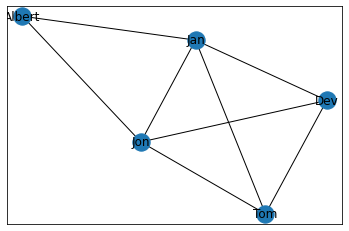

In [53]:
nx.draw_networkx(G_symmetric)

# Asymmetric Networks

In [5]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

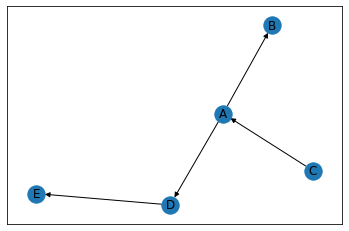

In [9]:
#nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

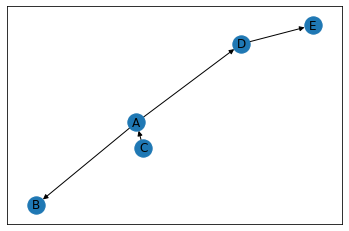

In [10]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

# Weighted Networks

In [67]:
G_weighted = nx.Graph()
G_weighted.add_edge('Jon','Jan', weight=25)
G_weighted.add_edge('Jon','Tom', weight=2)
G_weighted.add_edge('Jon','Albert', weight=5)
G_weighted.add_edge('Jon','Dev', weight=3)
G_weighted.add_edge('Jan','Tom', weight=20)
G_weighted.add_edge('Jan','Albert', weight=10)
G_weighted.add_edge('Jan','Dev', weight=7)
G_weighted.add_edge('Dev','Tom', weight=8)

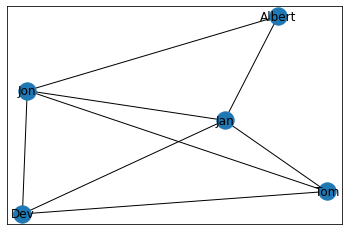

In [69]:
#nx.spring_layout(G_weighted)
nx.draw_networkx(G_weighted)

# Multigraph

In [73]:
G = nx.MultiGraph()
nx.add_path(G, [0, 1, 2])
key = G.add_edge(2, 3, weight=5)
[e for e in G.edges()]


[(0, 1), (1, 2), (2, 3)]

In [74]:
G.edges.data()
G.edges.data("weight", default=1)
G.edges(keys=True)
G.edges.data("weight", default=1, keys=True)
G.edges()

MultiEdgeDataView([(0, 1), (1, 2), (2, 3)])

In [75]:
# Degree: Degree of a node defines the number of connections a node has
nx.degree(G_symmetric, 'Dev')

3

In [76]:
# Clustering Coefficient
nx.average_clustering(G_symmetric)

0.8666666666666666

In [84]:
# Distance:
nx.shortest_path(G_symmetric, 'Dev', 'Albert')


['Dev', 'Jon', 'Albert']

In [88]:
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')
print(nx.info(G_symmetric))


Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


In [90]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)


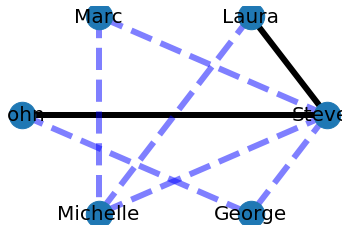

In [93]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

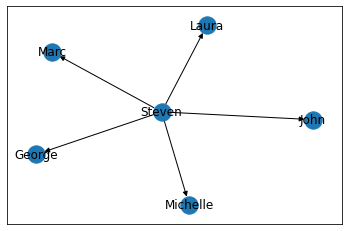

In [94]:
S = nx.bfs_tree(G_symmetric, 'Steven')
nx.draw_networkx(S)


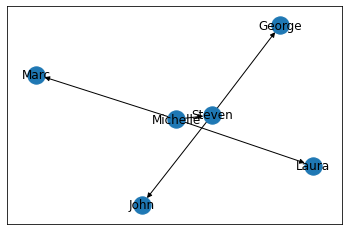

In [95]:
M = nx.bfs_tree(G_symmetric, 'Michelle')
nx.draw_networkx(M)


In [96]:
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

In [97]:
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

In [98]:
nx.betweenness_centrality(G_symmetric)

{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

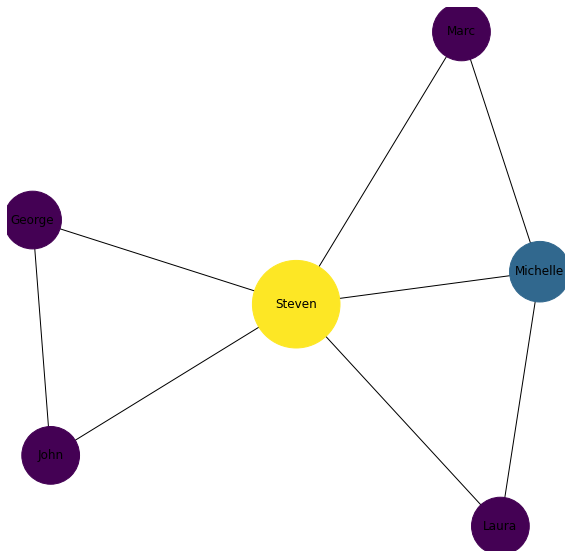

In [99]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');